We had originally trained a classifier model using ML.NET's Model Builder tool in Visual Studio. The selected model was a `LightGbmBinary` classifier. That model had an accuracy of 91.65%, an AUC of 97%, and an F1-score of 92.47%.

Here, we train our own light gradient-boosting machine using Python's `lightgbm` package. The documentation for this package is available at https://lightgbm.readthedocs.io/en/latest/index.html. We use the trained model to predict living arrangements for the 2016 TTS sample.

First, we prepare the input data.

In [1]:
import pandas as pd
df = pd.read_csv('../Data/SMTO_2015/Formatted.csv')
y = df['Family'].values

df['Distance'] = df.apply(lambda x: x['Dist.' + x['School']], axis=1)

df = df[['Cars', 'Children', 'Adults', 'Income', 'Age', 'Status', 'Licence', 'Distance', 'Work', 'Mode', 'PD']]

df['Income_Lo'] = (df['Income'] == 'Low').astype(int)
df['Income_Hi'] = (df['Income'] == 'High').astype(int)

df['Status_PT'] = (df['Status'] == 'PT').astype(int)
df['Status_FT'] = (df['Status'] == 'FT').astype(int)

df['Work_PT'] = (df['Work'].str.startswith('Yes, I work p')).astype(int)
df['Work_FT'] = (df['Work'].str.startswith('Yes') & (df['Work_PT'] == 0)).astype(int)
df['Work_NW'] = (df['Work'].str.startswith('No')).astype(int)

df['Transit'] = (df['Mode'] == 'Transit').astype(int)
df['Active'] = (df['Mode'] == 'Active').astype(int)
df['Auto'] = (df['Mode'] == 'Auto').astype(int)

df.drop(['Income', 'Status', 'Work', 'Mode'], inplace=True, axis=1) 
df.describe()

,Cars,Children,Adults,Age,Licence,Distance,PD,Income_Lo,Income_Hi,Status_PT,Status_FT,Work_PT,Work_FT,Work_NW,Transit,Active,Auto
count,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000
mean,1.132822,0.363103,3.025970,23.330847,0.597665,14.632733,14.865106,0.233527,0.169153,0.071281,0.928719,0.107750,0.015748,0.107335,0.638141,0.262813,0.090758
std,1.057430,0.735251,1.428023,6.877053,0.490386,13.307684,13.708582,0.423089,0.374900,0.257302,0.257302,0.310075,0.124503,0.309550,0.480555,0.440177,0.287275
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,19.000000,0.000000,3.165649,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000,21.000000,1.000000,11.743690,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,1.000000,4.000000,25.000000,1.000000,23.085450,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,9.000000,18.000000,16.000000,99.000000,1.000000,106.593800,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We separate the data into training and testing sets.

In [2]:
from sklearn.model_selection import train_test_split
x = df.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Now, we run the gradient-boosting machine.

In [3]:
import lightgbm as lgb
train = lgb.Dataset(x_train, label=y_train)
test = lgb.Dataset(x_test, label=y_test)
parameters = {'objective': 'binary', 'metric': ['auc', 'binary_logloss']}
model = lgb.train(parameters, train, 1000, valid_sets=test, early_stopping_rounds=5)

[1]	valid_0's auc: 0.955809	valid_0's binary_logloss: 0.615472
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.958698	valid_0's binary_logloss: 0.560801
[3]	valid_0's auc: 0.959713	valid_0's binary_logloss: 0.515355
[4]	valid_0's auc: 0.960434	valid_0's binary_logloss: 0.477378
[5]	valid_0's auc: 0.960987	valid_0's binary_logloss: 0.445495
[6]	valid_0's auc: 0.962319	valid_0's binary_logloss: 0.41705
[7]	valid_0's auc: 0.962685	valid_0's binary_logloss: 0.39307
[8]	valid_0's auc: 0.962749	valid_0's binary_logloss: 0.372882
[9]	valid_0's auc: 0.962745	valid_0's binary_logloss: 0.355145
[10]	valid_0's auc: 0.962952	valid_0's binary_logloss: 0.339703
[11]	valid_0's auc: 0.963558	valid_0's binary_logloss: 0.325754
[12]	valid_0's auc: 0.963672	valid_0's binary_logloss: 0.313817
[13]	valid_0's auc: 0.963991	valid_0's binary_logloss: 0.302897
[14]	valid_0's auc: 0.965214	valid_0's binary_logloss: 0.293517
[15]	valid_0's auc: 0.966591	valid_0's binary_logloss: 

We use the trained model to predict living arrangement based on the testing set.

In [4]:
y_pred = model.predict(x_test, num_iteration=model.best_iteration)
y_pred

array([0.98868852, 0.09815509, 0.06061947, ..., 0.9404712 , 0.01818379,
       0.92960969])

Let us look at the confusion matrix and accuracy of our model.

In [5]:
from numpy import diag
from sklearn.metrics import confusion_matrix, f1_score
preds = [1 if i >= 0.5 else 0 for i in y_pred]
cm = confusion_matrix(y_test, preds)
print("Accuracy:  {:.2f} %".format(sum(diag(cm))/sum(sum(cm)) * 100))
print("F-1 Score: {:.2f} %".format(f1_score(y_test, preds) * 100))
pd.DataFrame(cm)

Accuracy:  91.75 %
F-1 Score: 92.79 %


,0,1
0,1118,122
1,117,1539


Both our accuracy and F-1 score are comparable to our original model. Let us plot the ROC curve for our model and find the area under the curve.

Area under the ROC curve: 0.971


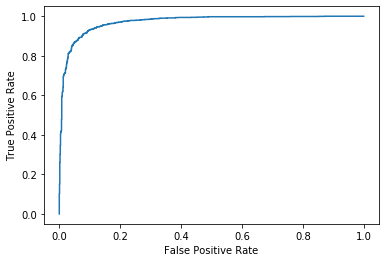

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

results = roc_curve(y_test, y_pred)
plt.plot(results[0], results[1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Area under the ROC curve: {:.3}'.format(roc_auc_score(y_test, y_pred)))

The area under our ROC curve is also comparable to our previous results. As such, we can accept this model and save it as a `.txt` file.

In [7]:
model.save_model('model.txt')